In [1]:
import pandas as pd
import numpy as np
import math
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso # to try elastic net
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Reading of the data
data = pd.read_csv('train.csv')

In [3]:
sns.set(font_scale=1)

### Meanings of the features

*   **SalePrice** : The property's sale price in dollars. This is the *target* variable that you're trying to predict.
*   **MSSubClass**: The building class
*   **MSZoning**: The general zoning classification
*   **LotFrontage**: Linear feet of street connected to property
*   **LotArea**: Lot size in square feet
*   **Street**: Type of road access
*   **Alley**: Type of alley access
*   **LotShape**: General shape of property
*   **LandContour**: Flatness of the property
*   **Utilities**: Type of utilities available
*   **LotConfig**: Lot configuration
*   **LandSlope**: Slope of property
*   **Neighborhood**: Physical locations within Ames city limits
*   **Condition1**: Proximity to main road or railroad
*   **Condition2**: Proximity to main road or railroad (if a second is present)
*   **BldgType**: Type of dwelling
*   **HouseStyle**: Style of dwelling
*   **OverallQual**: Overall material and finish quality
*   **OverallCond**: Overall condition rating
*   **YearBuilt**: Original construction date
*   **YearRemodAdd**: Remodel date
*   **RoofStyle**: Type of roof
*   **RoofMatl**: Roof material
*   **Exterior1st**: Exterior covering on house
*   **Exterior2nd**: Exterior covering on house (if more than one material)
*   **MasVnrType**: Masonry veneer type
*   **MasVnrArea**: Masonry veneer area in square feet
*   **ExterQual**: Exterior material quality
*   **ExterCond**: Present condition of the material on the exterior
*   **Foundation**: Type of foundation
*   **BsmtQual**: Height of the basement
*   **BsmtCond**: General condition of the basement
*   **BsmtExposure**: Walkout or garden level basement walls
*   **BsmtFinType1**: Quality of basement finished area
*   **BsmtFinSF1**: Type 1 finished square feet
*   **BsmtFinType2**: Quality of second finished area (if present)
*   **BsmtFinSF2**: Type 2 finished square feet
*   **BsmtUnfSF**: Unfinished square feet of basement area
*   **TotalBsmtSF**: Total square feet of basement area
*   **Heating**: Type of heating
*   **HeatingQC**: Heating quality and condition
*   **CentralAir**: Central air conditioning
*   **Electrical**: Electrical system
*   **1stFlrSF**: First Floor square feet
*   **2ndFlrSF**: Second floor square feet
*   **LowQualFinSF**: Low quality finished square feet (all floors)
*   **GrLivArea**: Above grade (ground) living area square feet
*   **BsmtFullBath**: Basement full bathrooms
*   **BsmtHalfBath**: Basement half bathrooms
*   **FullBath**: Full bathrooms above grade
*   **HalfBath**: Half baths above grade
*   **Bedroom**: Number of bedrooms above basement level
*   **Kitchen**: Number of kitchens
*   **KitchenQual**: Kitchen quality
*   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
*   **Functional**: Home functionality rating
*   **Fireplaces**: Number of fireplaces
*   **FireplaceQu**: Fireplace quality
*   **GarageType**: Garage location
*   **GarageYrBlt**: Year garage was built
*   **GarageFinish**: Interior finish of the garage
*   **GarageCars**: Size of garage in car capacity
*   **GarageArea**: Size of garage in square feet
*   **GarageQual**: Garage quality
*   **GarageCond**: Garage condition
*   **PavedDrive**: Paved driveway
*   **WoodDeckSF**: Wood deck area in square feet
*   **OpenPorchSF**: Open porch area in square feet
*   **EnclosedPorch**: Enclosed porch area in square feet
*   **3SsnPorch**: Three season porch area in square feet
*   **ScreenPorch**: Screen porch area in square feet
*   **PoolArea**: Pool area in square feet
*   **PoolQC**: Pool quality
*   **Fence**: Fence quality
*   **MiscFeature**: Miscellaneous feature not covered in other categories
*   **MiscVal**: $Value of miscellaneous feature
*   **MoSold**: Month Sold
*   **YrSold**: Year Sold
*   **SaleType**: Type of sale
*   **SaleCondition**: Condition of sale

In [4]:
data.shape

(1460, 81)

In [5]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Data cleaning and dealing with missing data

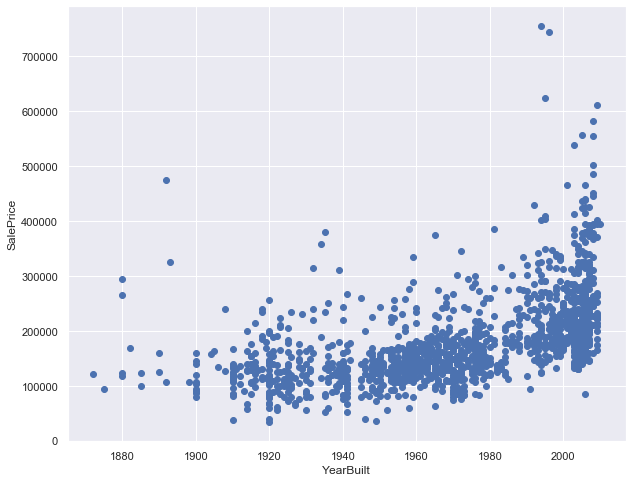

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(data['YearBuilt'], data['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [7]:
# delete the outliers (axis = 0 -> rows)
data.drop(data[(data.YearBuilt < 1900) & (data.SalePrice > 300000)].index, axis=0, inplace=True)

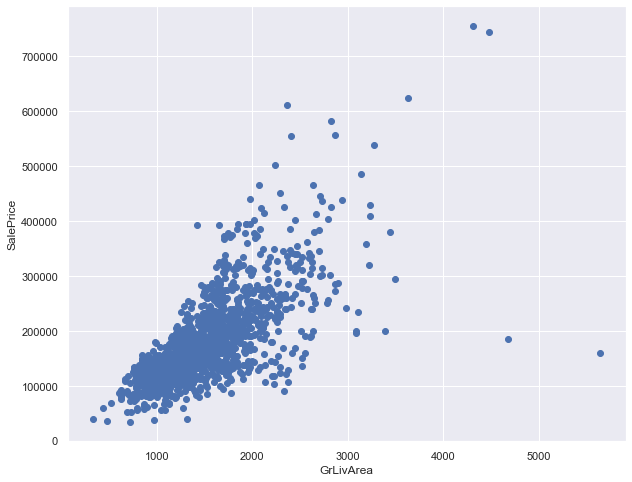

In [8]:
plt.figure(figsize = (10,8))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [9]:
data.drop(data[(data.GrLivArea > 4000) & (data.SalePrice < 200000)].index, axis=0, inplace=True)

In [10]:
data.isnull().mean()[data.isnull().mean() > 0].sort_values(ascending=False)

PoolQC          0.995879
MiscFeature     0.962912
Alley           0.937500
Fence           0.807692
FireplaceQu     0.473901
LotFrontage     0.177885
GarageYrBlt     0.055632
GarageType      0.055632
GarageFinish    0.055632
GarageQual      0.055632
GarageCond      0.055632
BsmtFinType2    0.026099
BsmtExposure    0.026099
BsmtFinType1    0.025412
BsmtCond        0.025412
BsmtQual        0.025412
MasVnrArea      0.005495
MasVnrType      0.005495
Electrical      0.000687
dtype: float64

In [11]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace =True)

In [12]:
data = data.reset_index(drop=True)

In [13]:
# separate categorical and numerical features

categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [14]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
print("Number of numerical features : " + str(len(numerical_features)))
print("Number of categorical features : " + str(len(categorical_features)))

Number of numerical features : 37
Number of categorical features : 39


In [17]:
# missing numerical values is replaced by median

data_num = data[numerical_features].fillna(data[numerical_features].median())

In [18]:
# missing categorical values is replaced by mode

data_cat = data[categorical_features].fillna(data[categorical_features].mode())

### Data transformation and categorical features encoding

In [19]:
# skewness

from scipy.stats import skew 
skewness = data_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.418175
PoolArea         15.921472
LotArea          12.576219
3SsnPorch        10.279262
LowQualFinSF      9.180549
KitchenAbvGr      4.476748
BsmtFinSF2        4.244209
BsmtHalfBath      4.092601
ScreenPorch       4.091767
EnclosedPorch     3.081275
MasVnrArea        2.691418
OpenPorchSF       2.234297
SalePrice         1.883321
LotFrontage       1.721561
WoodDeckSF        1.542986
MSSubClass        1.406784
GrLivArea         0.987328
BsmtUnfSF         0.924918
1stFlrSF          0.890578
2ndFlrSF          0.811395
BsmtFinSF1        0.762352
HalfBath          0.683518
OverallCond       0.675576
TotRmsAbvGrd      0.649329
Fireplaces        0.632849
BsmtFullBath      0.587542
TotalBsmtSF       0.512063
MoSold            0.215340
BedroomAbvGr      0.213745
OverallQual       0.183681
GarageArea        0.131477
YrSold            0.094663
FullBath          0.025826
GarageCars       -0.341858
YearRemodAdd     -0.499324
YearBuilt        -0.606039
GarageYrBlt      -0.674682
d

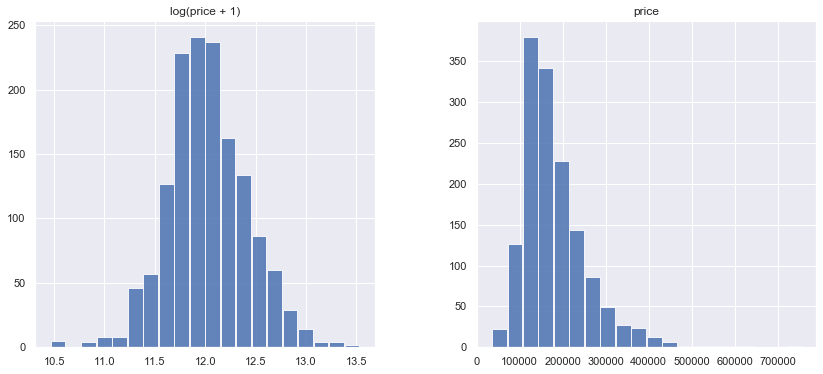

In [20]:
plt.rcParams['figure.figsize'] = (14.0, 6.0)
prices = pd.DataFrame({"price": data["SalePrice"], "log(price + 1)":np.log1p(data["SalePrice"])})
prices.hist(bins=20, alpha=0.85, rwidth=0.95)
plt.show()

In [21]:
skewed_cols = skewness[abs(skewness)>1].index

In [22]:
skewed_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [23]:
data_num[skewed_cols] = np.log1p(data_num[skewed_cols])

In [24]:
# dummy variables

data_cat = pd.get_dummies(data_cat)
data_cat.shape

(1456, 237)

In [25]:
data_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
X = pd.concat([data_cat, data_num], axis=1) # axis = 1 --> add to the columns (to the right)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [27]:
X.shape

(1456, 273)

In [28]:
y.shape

(1456,)

In [29]:
X.isnull().sum().sum()

0

### Modelling

In [30]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [31]:
X_train.shape

(1164, 273)

In [32]:
X_test.shape

(292, 273)

In [33]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.0883757185703761
rmse on test 4187822.8587782052


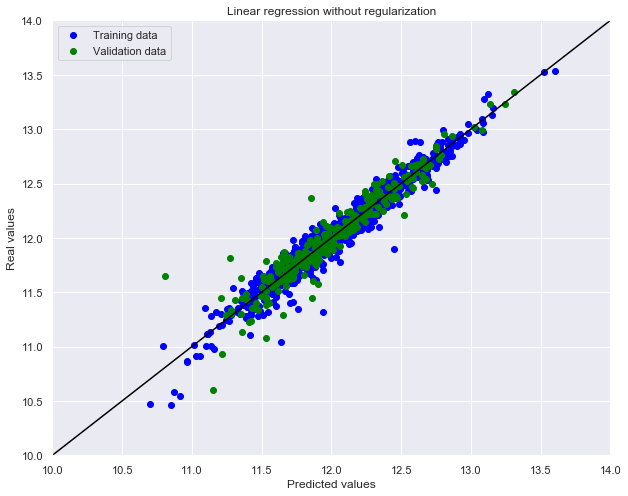

In [34]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression without regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.xlim((10,14))
plt.ylim((10,14))
plt.show()

In [35]:
# Ridge regression

lr_r = Ridge(alpha=1.0)
lr_r.fit(X_train, y_train)
test_pred = lr_r.predict(X_test)
train_pred = lr_r.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.09002603731939686
rmse on test 0.11078290395345276


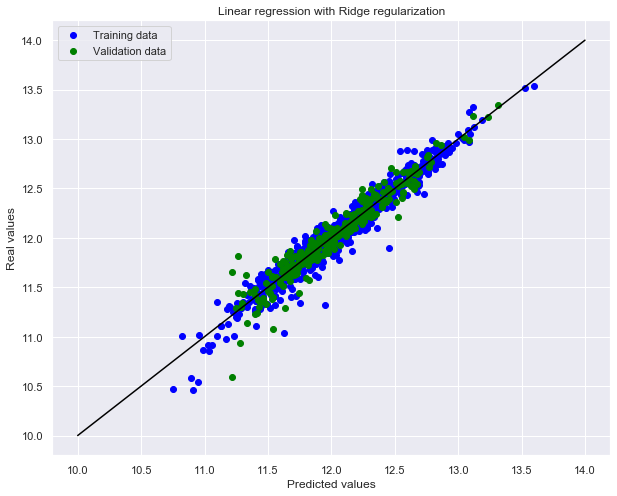

In [36]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [37]:
# LASSO regression

lr_l = Lasso(alpha=1)
lr_l.fit(X_train, y_train)
test_pred = lr_l.predict(X_test)
train_pred = lr_l.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.17067780472649044
rmse on test 0.1712681994605415


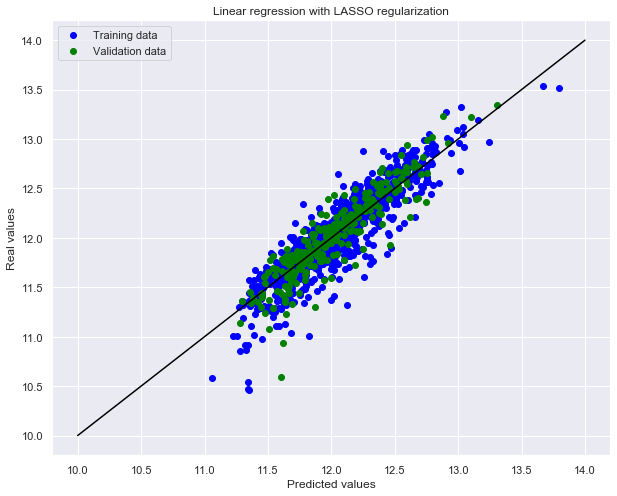

In [38]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression with LASSO regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

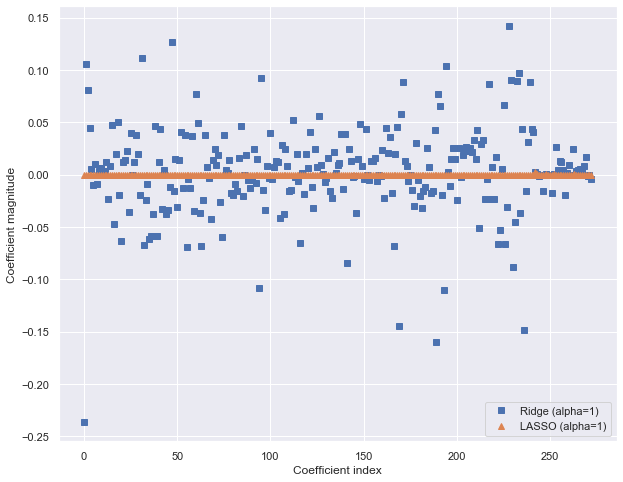

In [39]:
plt.figure(figsize = (10,8))
plt.plot(lr_r.coef_, 's', label="Ridge (alpha=1)")
plt.plot(lr_l.coef_, '^', label="LASSO (alpha=1)")
#plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc = 'lower right')
plt.show()

In [40]:
coef_lasso = pd.Series(lr_l.coef_, index = X_train.columns)
coef_lasso

MSZoning_C (all)   -0.0
MSZoning_FV         0.0
MSZoning_RH        -0.0
MSZoning_RL         0.0
MSZoning_RM        -0.0
                   ... 
ScreenPorch         0.0
PoolArea            0.0
MiscVal            -0.0
MoSold              0.0
YrSold             -0.0
Length: 273, dtype: float64

In [41]:
print("Lasso has remained " + str(sum(coef_lasso != 0)) + " variables and excluded " +  str(sum(coef_lasso == 0)))

Lasso has remained 7 variables and excluded 266


In [42]:
important_coef = coef_lasso.sort_values().tail(9)

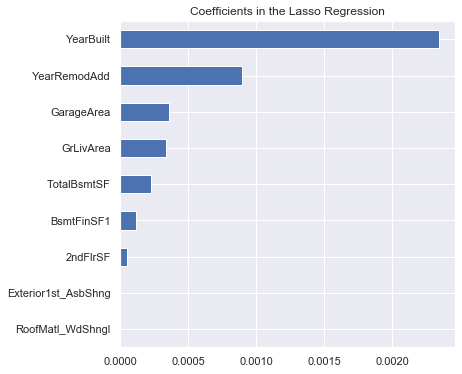

In [43]:
plt.figure(figsize = (6,6))
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Regression")
plt.show()

In [44]:
coef_ridge = pd.Series(lr_r.coef_, index = X_train.columns)
coef_ridge

MSZoning_C (all)   -0.235843
MSZoning_FV         0.105623
MSZoning_RH         0.080472
MSZoning_RL         0.044170
MSZoning_RM         0.005579
                      ...   
ScreenPorch         0.007958
PoolArea            0.016759
MiscVal            -0.001311
MoSold             -0.000733
YrSold             -0.003795
Length: 273, dtype: float64

In [45]:
print("Ridge has remained " + str(sum(coef_ridge != 0)) + " variables and excluded " +  str(sum(coef_ridge == 0)))

Ridge has remained 270 variables and excluded 3


In [46]:
coef_ridge.sort_values().tail(20)

Exterior2nd_CmentBd      0.052471
MasVnrType_Stone         0.056476
Heating_OthW             0.058260
Functional_Min2          0.065857
SaleType_ConLD           0.066178
Condition2_Feedr         0.076960
Functional_Min1          0.077421
MSZoning_RH              0.080472
GarageCond_Po            0.086443
LotArea                  0.088103
Heating_Wall             0.088436
SaleCondition_AdjLand    0.089137
SaleType_Oth             0.090515
Exterior1st_BrkFace      0.092239
SaleCondition_Alloca     0.097284
Functional_Typ           0.103391
MSZoning_FV              0.105623
Neighborhood_Crawfor     0.111174
Neighborhood_StoneBr     0.126702
SaleType_New             0.141788
dtype: float64

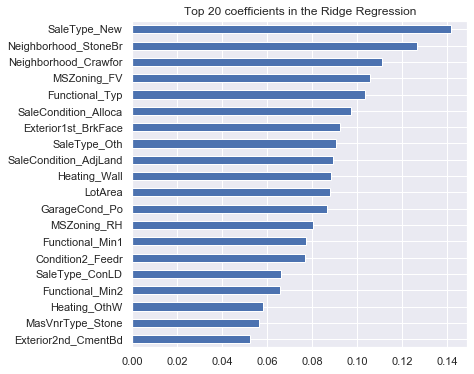

In [47]:
plt.figure(figsize = (6,6))
coef_ridge.sort_values().tail(20).plot(kind = "barh")
plt.title("Top 20 coefficients in the Ridge Regression")
plt.show()

In [48]:
coef_lr = pd.Series(lr.coef_, index = X_train.columns)
coef_lr

MSZoning_C (all)   -93136.939602
MSZoning_FV        -93136.505528
MSZoning_RH        -93136.544178
MSZoning_RL        -93136.585928
MSZoning_RM        -93136.625989
                        ...     
ScreenPorch             0.008462
PoolArea                0.013569
MiscVal                -0.001651
MoSold                 -0.000679
YrSold                 -0.004139
Length: 273, dtype: float64

### Exercises

1) Try one more way to encode categorical variables. Compare the result of modelling with previous one. Make conclusions.   
2) Try one more way to fill missing values. Make conclusions.  
3) Find the best value of parameter alpha for both Ridge and LASSO regressions using Grid Search or Random Search. Make conclusions.  
4) Try ElasticNet for modelling. Choose the best model and explain your choise.  

In [49]:
# k-nearest neighbors regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.17396429175272568
rmse on test 0.18588118800557332


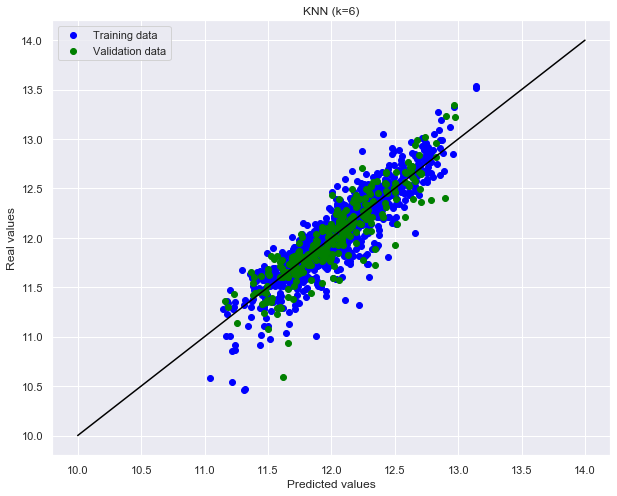

In [52]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("KNN (k=6)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [53]:
# Minkowski distance
# See about metrics in more details https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

knn = KNeighborsRegressor(n_neighbors=5, p=1)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.16057162950029064
rmse on test 0.1767949009161529


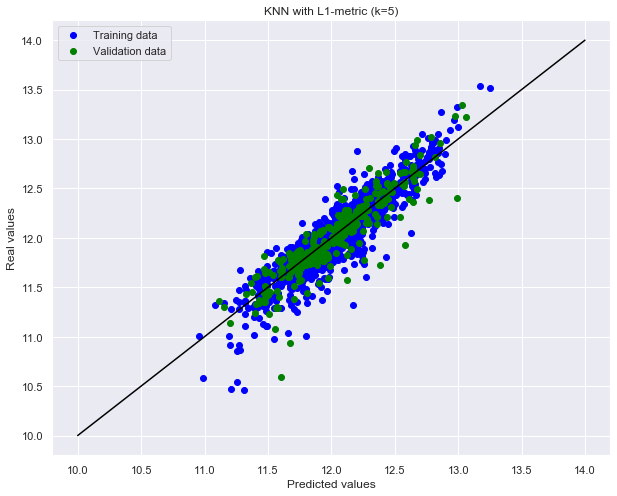

In [54]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("KNN with L1-metric (k=5)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [55]:
# weights parameter

knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=1)
knn.fit(X_train, y_train)
test_pred_knn = knn.predict(X_test)
train_pred_knn = knn.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_knn)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_knn)))

rmse on train 0.0
rmse on test 0.17479608692522886


### Exercise

Find the best value of parameters for KNN regressor using Grid Search or Random Search. Make conclusions.

In [56]:
# Decision Tree regressor

In [57]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=20, random_state=0)
dt.fit(X_train, y_train)
test_pred_dt = dt.predict(X_test)
train_pred_dt = dt.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_dt)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_dt)))

rmse on train 0.16009168537866256
rmse on test 0.17276360746119973


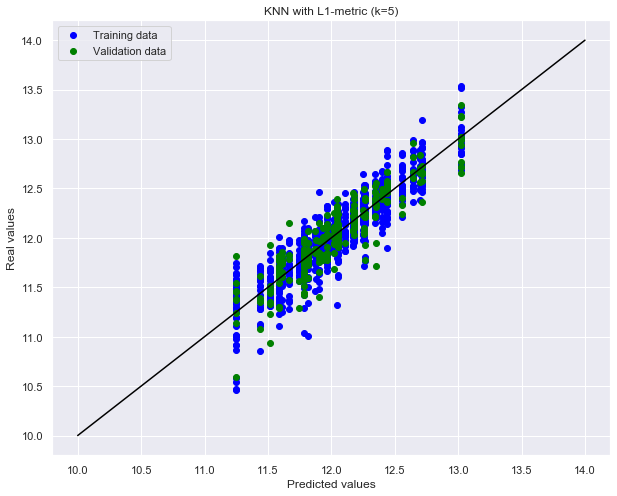

In [58]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred_dt, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred_dt, y_test, c = "green",  label = "Validation data")
plt.title("KNN with L1-metric (k=5)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


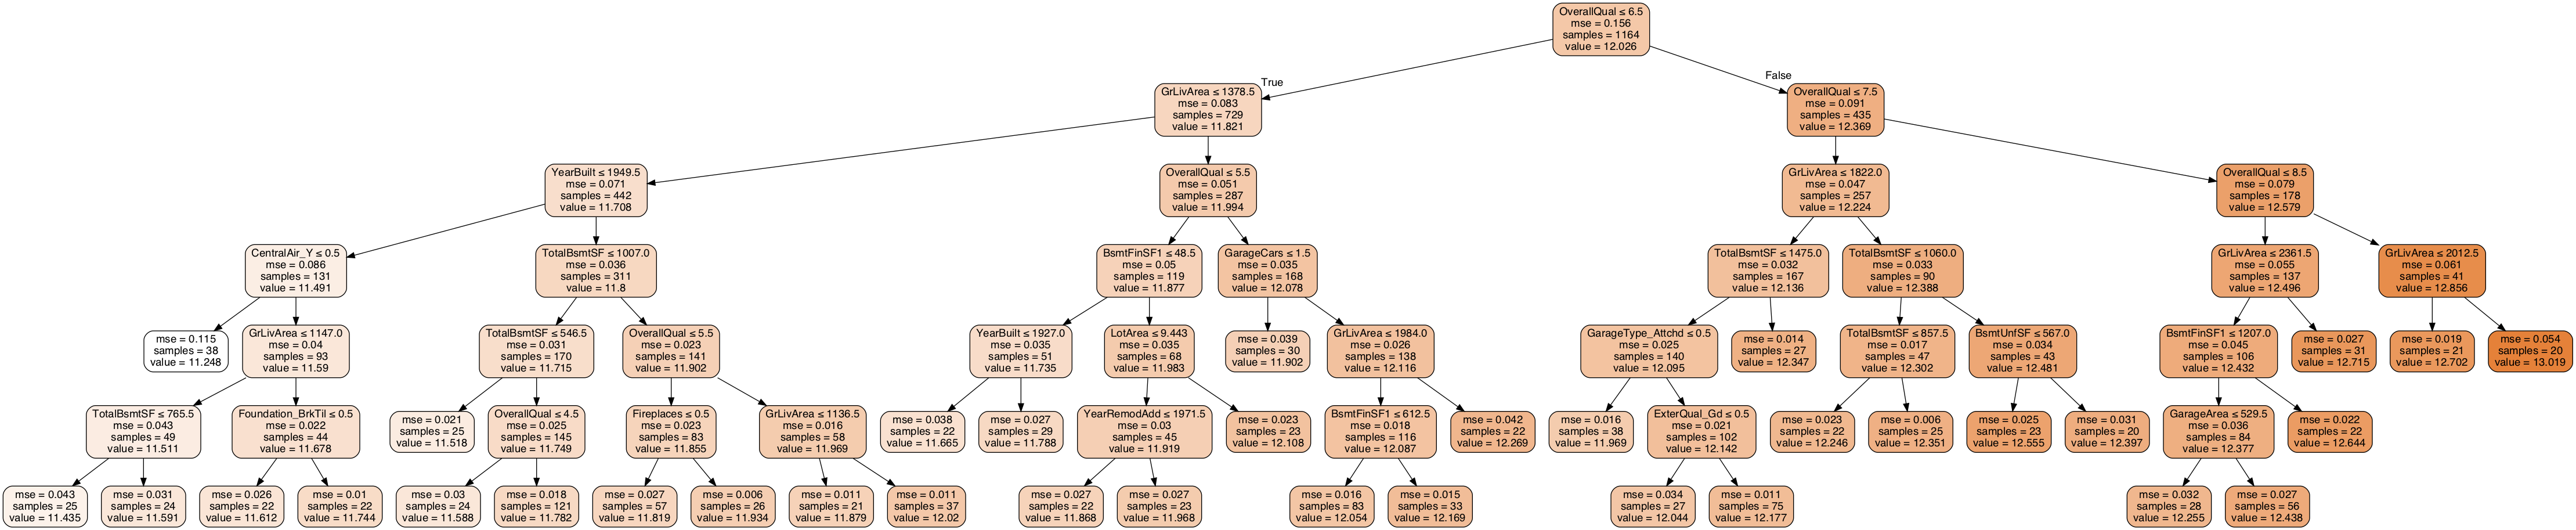

In [59]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = X_train.columns
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True, 
                feature_names=feature_names,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.set_size('"12,12"')
Image(graph.create_png())

In [60]:
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [61]:
imp = pd.DataFrame({'feature': X_train.columns, 'importance': dt.feature_importances_})
imp = imp[imp.importance > 0].sort_values(by = 'importance', ascending=True)

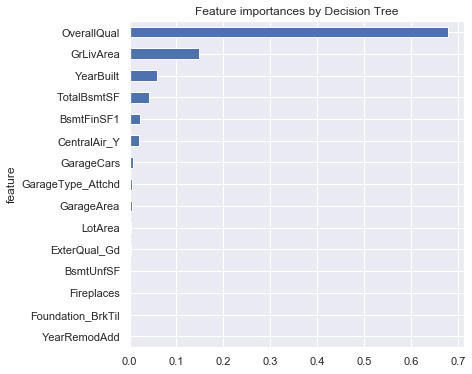

In [62]:
imp.plot.barh(y='importance', x='feature', legend=False, figsize=(6,6))
plt.title("Feature importances by Decision Tree")
plt.show()

In [63]:
# Ensemble methods

In [64]:
# simple averaging

print('rmse on train', math.sqrt(mean_squared_error(y_train, 0.5*train_pred_knn+0.5*train_pred_dt)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, 0.5*test_pred_knn+0.5*test_pred_dt)))

rmse on train 0.08004584268933125
rmse on test 0.15074078147695916


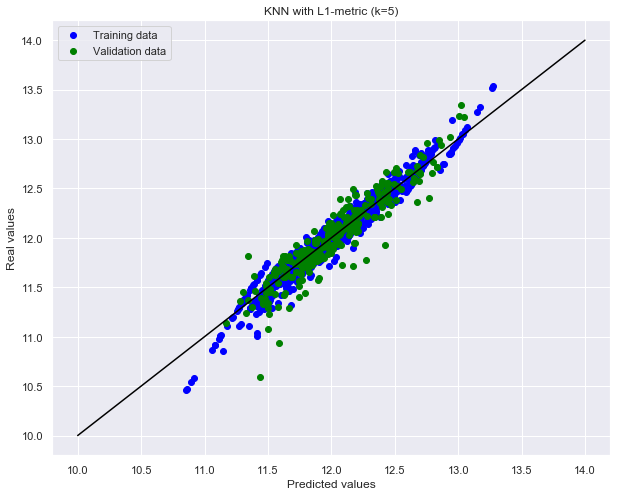

In [65]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(0.5*train_pred_knn+0.5*train_pred_dt, y_train, c = "blue",  label = "Training data")
plt.scatter(0.5*test_pred_knn+0.5*test_pred_dt, y_test, c = "green",  label = "Validation data")
plt.title("KNN with L1-metric (k=5)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [66]:
# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=1)
rf.fit(X_train, y_train)
test_pred_rf = rf.predict(X_test)
train_pred_rf = rf.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_rf)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_rf)))

rmse on train 0.10542593526849983
rmse on test 0.14084781597580093


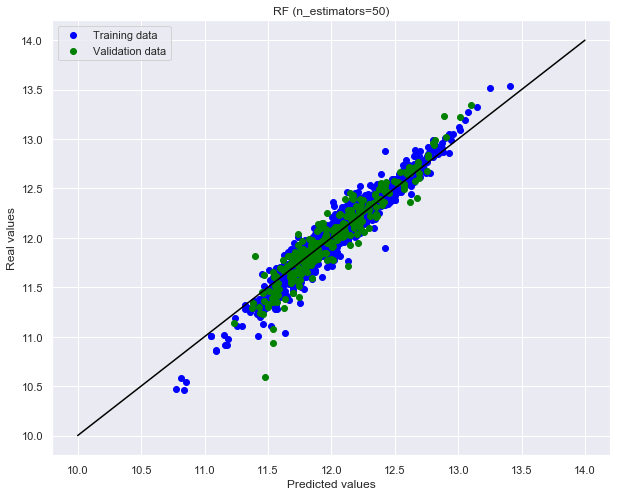

In [69]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred_rf, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred_rf, y_test, c = "green",  label = "Validation data")
plt.title("RF (n_estimators=50)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [70]:
# Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node 
# averaged over all trees of the ensemble
imp = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
imp = imp.sort_values(by = 'importance', ascending=True)

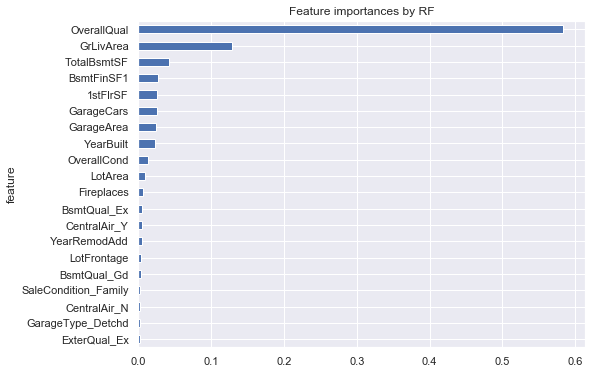

In [71]:
imp.tail(20).plot.barh(y='importance', x='feature', legend=False, figsize=(8,6))
plt.title("Feature importances by RF")
plt.show()

### Exercise

Find the best value of parameters for RF regressor using Grid Search or Random Search. Make conclusions.

In [72]:
# Extra Tree

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

In [74]:
tr = ExtraTreesRegressor(n_estimators=50, max_depth=6, random_state=1)
tr.fit(X_train, y_train)
test_pred_tr = tr.predict(X_test)
train_pred_tr = tr.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_tr)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_tr)))

rmse on train 0.11348472912652588
rmse on test 0.13762728642858077


In [75]:
imp = pd.DataFrame({'feature': X_train.columns, 'importance': tr.feature_importances_})
imp = imp.sort_values(by = 'importance', ascending=True)

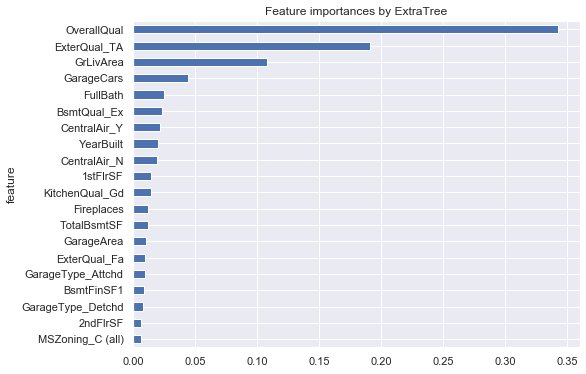

In [76]:
imp.tail(20).plot.barh(y='importance', x='feature', legend=False, figsize=(8,6))
plt.title("Feature importances by ExtraTree")
plt.show()

In [77]:
# Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# max_depth, max_features, min_samples_leaf against overfitting
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3, 
                                max_features=0.7, min_samples_leaf=20, random_state=42)
gbr.fit(X_train, y_train)
test_pred_tr = gbr.predict(X_test)
train_pred_tr = gbr.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_tr)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_tr)))

rmse on train 0.10202505468810995
rmse on test 0.12372811218097876


In [80]:
imp = pd.DataFrame({'feature': X_train.columns, 'importance': gbr.feature_importances_})
imp = imp.sort_values(by = 'importance', ascending=True)

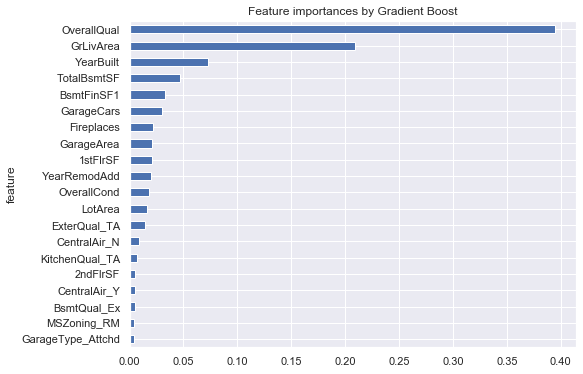

In [81]:
imp.tail(20).plot.barh(y='importance', x='feature', legend=False, figsize=(8,6))
plt.title("Feature importances by Gradient Boost")
plt.show()

In [82]:
# Further reading https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [83]:
### LightGBM

In [85]:
import lightgbm as lgb

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [86]:
parameters = {
    'application': 'regression',
    'metric': 'mse',
    'boosting': 'gbdt',
    'num_leaves': 34,
    'max_depth': 2,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.4,
    'bagging_freq': 2,
    'learning_rate': 0.02
}

In [87]:
train_data = lgb.Dataset(X_train.values, label=y_train.values)
lgbm = lgb.train(parameters, train_data, num_boost_round=600)
test_pred_tr = lgbm.predict(X_test.values)
train_pred_tr = lgbm.predict(X_train.values)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_tr)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_tr)))

rmse on train 0.10407291175365148
rmse on test 0.11498686929173889


In [88]:
impTmp = lgbm.feature_importance()
importances = pd.concat([pd.Series(X_train.columns, name='feature'), pd.Series(impTmp/np.sum(impTmp), name='importance')], 
                        axis=1).sort_values('importance')

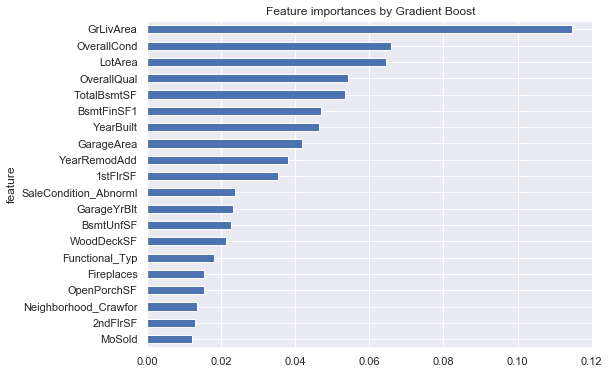

In [89]:
importances.tail(20).plot.barh(y='importance', x='feature', legend=False, figsize=(8,6))
plt.title("Feature importances by Gradient Boost")
plt.show()

In [ ]:
# Further reading https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [ ]:
### XGboost

In [90]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Parameters tuning
model = xgb.XGBRegressor()
param_dict = {"max_depth": [2,3,5],
              "n_estimators": [200, 300],
              "learning_rate": [0.05, 0.1],
              "colsample_bytree": [0.6]}
xgboost = GridSearchCV(model, param_grid=param_dict, cv = 3, n_jobs=-1)
xgboost.fit(X_train, y_train)

xgboost.best_estimator_

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:24:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [91]:
test_pred_tr = xgboost.best_estimator_.predict(X_test)
train_pred_tr = xgboost.best_estimator_.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred_tr)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred_tr)))

rmse on train 0.05540595594490442
rmse on test 0.11925100507333465


In [92]:
imp = pd.DataFrame({'feature': X_train.columns, 'importance': xgboost.best_estimator_.feature_importances_})
imp = imp.sort_values(by = 'importance', ascending=True)

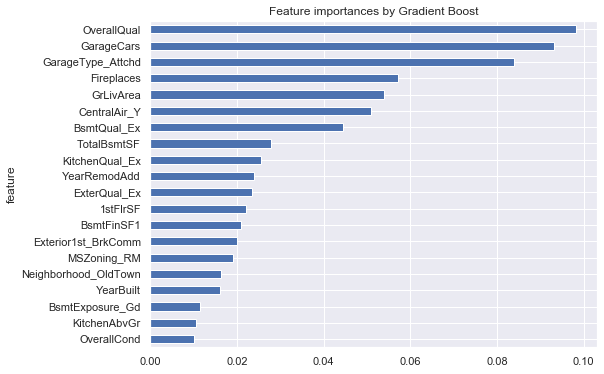

In [93]:
imp.tail(20).plot.barh(y='importance', x='feature', legend=False, figsize=(8,6))
plt.title("Feature importances by Gradient Boost")
plt.show()

In [ ]:
### Further reading: https://xgboost.readthedocs.io/en/latest/parameter.html